In [249]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import math
from gekko import GEKKO
import os
EPS = 10e-6

## Здание 2

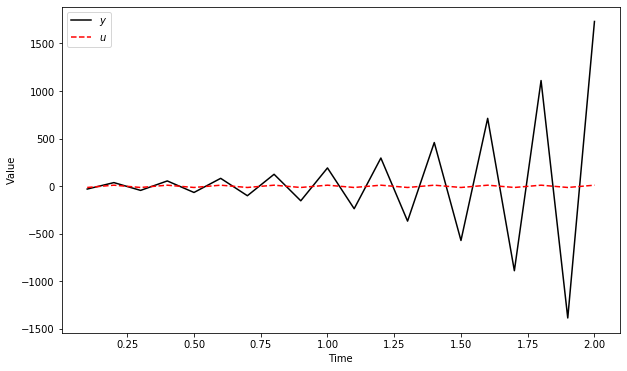

In [257]:
m = GEKKO(remote = False)
nt = 21   
m.time = np.linspace(0,2,nt)

y = m.Var(value=26)   
z = m.Var(value=5)
#t = m.Var(value = 0)
u = m.Var(value=1, lb=-14, ub=10)
p = np.zeros(nt)
p[0] = 26.0
final = m.Param(value=p)

m.Equation(y.dt()== 18 * y + u) # y' = a3 * y + u
#m.Equation(t.dt() == 1) 
m.Equation(z.dt()== 5 * y - 1 * u) # F(y,y',u,t)
m.Obj(z*final) # Целевая функция
m.options.IMODE = 6  #выбираем задачу с которой работаем
m.solve(disp=False)

 # Графики
plt.figure(figsize=(10, 6))
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## Задача 6

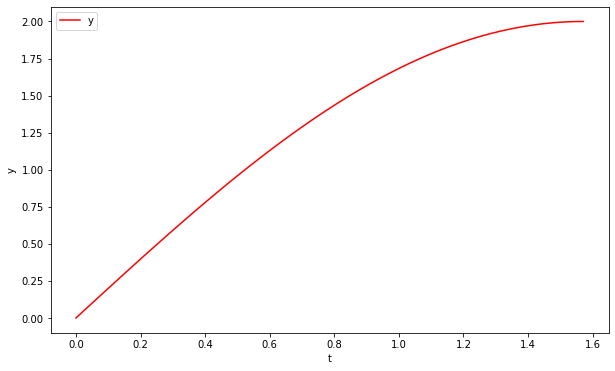

In [258]:
# Задаём дискретное время
num_of_fractions = 51   # Количество делений на дискретной шкале времени тут проверит 21, 200+, 500+ и 951
                            #на больших значениях что-то вроде переобучения
t = np.linspace(0, np.pi/2, num_of_fractions)     # Дискретная шкала времени
dt = t[1] - t[0]    # Рассчитываем шаг шкалы


# Задаём оптимизируемый функционал в дискретном времени
def f(y):
    return np.sum(((y[1:] - y[:-1]) / dt) ** 2 - y[1:] ** 2)

y0 = [0.2 for x in range(0, num_of_fractions)]     # Начальное значение y
#print(y0)

# Задаем ограничения 
bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (0.0 - EPS, 0.0 + EPS), (2.0 - EPS, 2.0 + EPS)

# Минимизируем функционал
res = minimize(f, y0, method='l-bfgs-b', bounds=bounds)

# Любимые графики)
plt.figure(figsize=(10, 6))
plt.plot(t, res.x, 'r')
plt.xlabel('t')
plt.ylabel('y')
plt.legend('y численный')
plt.show()

## Здание 7

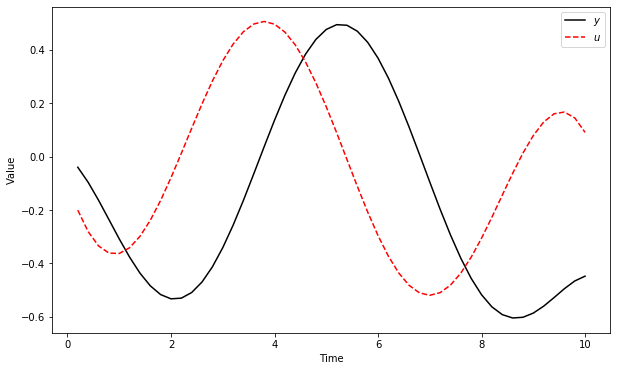

In [259]:
### A)
m = GEKKO(remote = False)
nt = 51   
m.time = np.linspace(0,10,nt)

y = m.Var(value=0)   
z = m.Var(value=5)
t = m.Var(value =1)
u = m.Var(value=1)
p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

m.Equation(y.dt()== u) 
m.Equation(t.dt() == 1) 
m.Equation(z.dt()== (y - m.cos(t))**2 + u**2)
m.Obj(z*final) # Целевая функция
m.options.IMODE = 6  #выбираем задачу с которой работаем
m.solve(disp=False)

 # Графики
plt.figure(figsize=(10, 6))
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
#plt.plot(m.time[1:],t.value[1:],'g--',label=r'$t$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

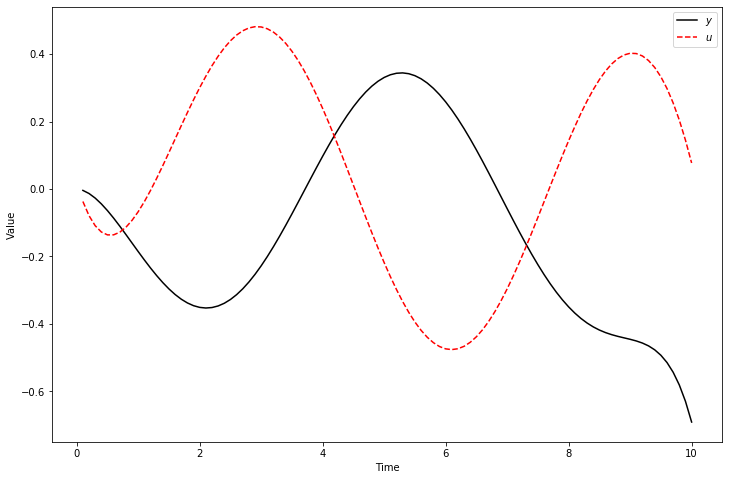

In [260]:
### Б)
m = GEKKO(remote = False)
nt = 101   # Не заметил, чтобы вляло на результат
m.time = np.linspace(0,10,nt)

y = m.Var(value=0) #y(0) = 0
z = m.Var(value=5)
t = m.Var(value =1)
u = m.Var(value=1)
p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

m.Equation(y.dt()== u + y) 
m.Equation(t.dt() == 1) 
m.Equation(z.dt()== (y - m.cos(t))**2 + u**2)
m.Obj(z*final) # Целевая функция
m.options.IMODE = 6  #выбираем задачу с которой работаем
m.solve(disp=False)

 # Графики
plt.figure(figsize=(12, 8))
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
#plt.plot(m.time[1:],t.value[1:],'g--',label=r'$t$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()